In [27]:
import json
import base64
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from plots import displayImagesWithBoxesYolo

In [76]:
# Define the API base URL
BASE_URL = "http://127.0.0.1:8001"


# Test the /models endpoint
def test_list_models():
    response = requests.get(f"{BASE_URL}/models")
    print("Models List:", response.json())


def test_segment_image_api(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(BASE_URL + "/segment", files=files)

    if response.status_code == 200:
        resp = response.content.decode("utf-8")
        resp = json.loads(resp)
        image_data = base64.b64decode(resp["image"])

        segmented_image = Image.open(BytesIO(image_data))
        return segmented_image
    else:
        print(f"Failed to segment image. Status code: {response.status_code}")


# Test the /detect endpoint
def test_detect_bbox(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(f"{BASE_URL}/detect", files=files)
        if response.status_code == 200:
            resp = response.content.decode("utf-8")
            resp = json.loads(resp)
            print("Detection successful")

    return resp


import os


# Test the /detect_image endpoint
def test_detect_bbox_image(image_path):
    with open(image_path, "rb") as image_file:
        files = {"file": image_file}
        response = requests.post(f"{BASE_URL}/detect_image", files=files)
        if response.status_code == 200:
            resp = response.content.decode("utf-8")
            resp = json.loads(resp)
            image_data = base64.b64decode(resp["image"])
            imageWithBoxes = Image.open(BytesIO(image_data))
            print("Detection successful")
    return imageWithBoxes


# Execute tests
if __name__ == "__main__":
    test_list_models()
    # test_detect_bbox_image("test_image.jpg")  # Replace with your image path

Models List: {'models': [{'name': 'Segmentation Model', 'type': 'ONNX', 'path': './bestModels/fcn.onnx'}, {'name': 'Bounding Box Model', 'type': 'Pytorch', 'path': './bestModels/yolo.pt'}]}


In [41]:
segmentedImage = test_segment_image_api(
    "./data/rgb_0039.png"
)  # Replace with your image path

In [65]:
yoloOutput = test_detect_bbox("./data/rgb_0630.png")

Detection successful


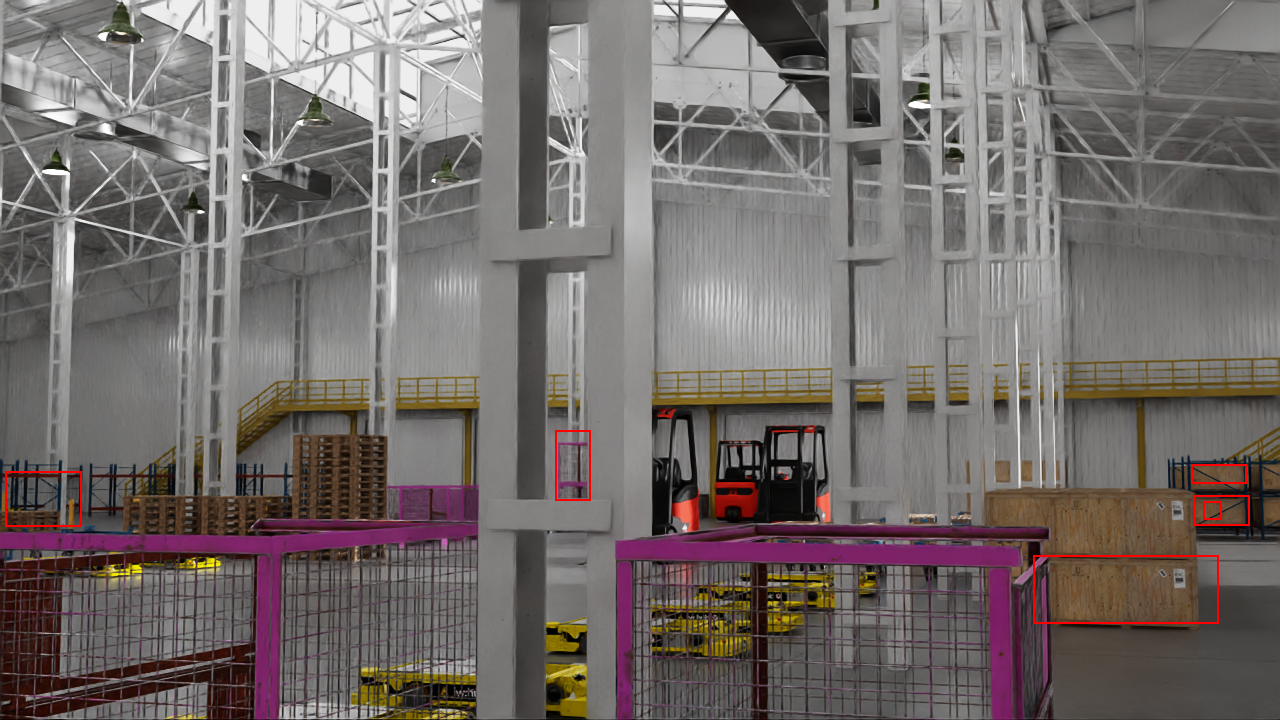

In [66]:
displayImagesWithBoxesYolo("./data/rgb_0630.png", yoloOutput["boxes"])

In [77]:
image = test_detect_bbox_image("./data/rgb_0630.png")

Detection successful


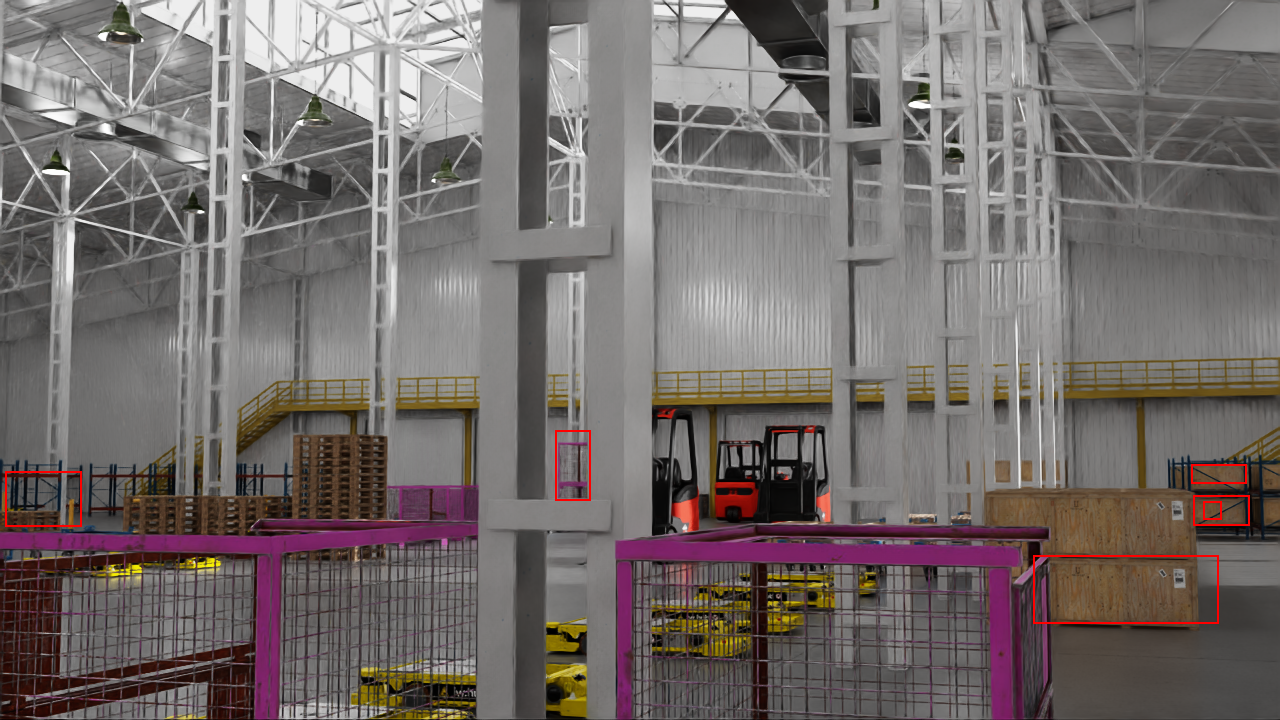

In [79]:
image